## API Example: Plot temperature vs salinity for a window of time

#### This example illustrates how to plot an hour of data from the RV Sikuliaq's Thermosalinograph.


In [1]:
# Step 1. Import a few necessary modules

import requests  # We use the resuests module to communicate with the API
import json  # The json module provides serialization/deserialization of API responses
#import urllib.parse  # urllib.parse is used for url encoding, % encoding in our case 
#from datetime import datetime, timedelta  # For help with managing ISO dates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
from urllib3.exceptions import InsecureRequestWarning  # For use with self signed certificates
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)

print("Imports complete, setting API variables.")

Imports complete, setting API variables.


In [2]:
# Step 2. Set variables for the API URL

# The Base URL for the Sikuliaq's CORIOLIX API.
api_url = "https://coriolix.sikuliaq.alaska.edu/api"

# Metadata URLs can be made by adding the sensor and parameter endpoints to the base url.
sensor_url = api_url + "/sensor"
parameter_url = api_url + "/parameter"

# Sensor of interest
sensor_id = "seatsg450454"

# Parameters of interest
t = "Temperature"
s = "Salinity"

print("API Variables set, Sensor = "+sensor_id+", Parameters = "+t+", "+s)

API Variables set, Sensor = seatsg450454, Parameters = Temperature, Salinity


In [4]:
# Step 3. We know the sensor_id for sensor of interest and we know the parameters we seek,
# We'll need to find 3 additional peices of information before we can make a data request.
# We need to know what table the data is stored in (data_table), and we need to know what
# field in that table the temperature and salinity data is stored in.

# Function to extract data_table and data_field for sensor_id and parameter pair.
def get_table_and_parameter(sensor_id, parameter_name):
    query_url = parameter_url+"/?sensor_id="+sensor_id+"&short_name="+parameter_name+"&format=json"
    response = requests.get(query_url, verify=False)
    responseJSON = json.loads(response.text)
    data_table = responseJSON[0]['data_table']
    data_field = responseJSON[0]['data_fieldname']
    
    return data_table, data_field

temp_table, temp_field = get_table_and_parameter(sensor_id, t)
sal_table, sal_field = get_table_and_parameter(sensor_id, s)

print("Thermosalinograph temperature data is stored in table: " + temp_table + " and field: "+temp_field)
print("Thermosalinograph salinity data is stored in table: " + sal_table + " and field: "+sal_field)

Thermosalinograph temperature data is stored in table: sensor_float_2 and field: p1
Thermosalinograph salinity data is stored in table: sensor_float_2 and field: p3


In [6]:
# Step 4. Build and submit your data query to the API, load the result to a pandas dataframe.

# Establish start and end datetimes, then build a data query
end_time = "2024-11-19T17:30:00.00Z"
start_time = "2024-11-15T16:30:00.00Z"
data_query_url = api_url+'/'+temp_table+'/'
query_url = data_query_url+'?date_after='+start_time+'&date_before='+end_time+'&format=json'

# Run the query and load the response
response = requests.get(query_url, verify=False)
dataJSON = json.loads(response.text)

# Create a pandas dataframe from the data
df = pd.DataFrame(dataJSON)
df

,time,sensor_id,time_raw,p0,p1,p2,p3,p4,p5,p6,...,p8,f0,f1,f2,f3,f4,f5,f6,f7,f8
0,2024-11-15T16:30:03.016000Z,seatsg450454,2024-11-15T16:30:03.016000Z,None,25.5073,5.34387,34.8803,1535.492,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
1,2024-11-15T16:30:08.015800Z,seatsg450454,2024-11-15T16:30:08.015800Z,None,25.5083,5.34397,34.8803,1535.494,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
2,2024-11-15T16:30:13.016000Z,seatsg450454,2024-11-15T16:30:13.016000Z,None,25.5076,5.34384,34.8799,1535.492,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
3,2024-11-15T16:30:18.015600Z,seatsg450454,2024-11-15T16:30:18.015600Z,None,25.5081,5.34397,34.8805,1535.494,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
4,2024-11-15T16:30:23.016100Z,seatsg450454,2024-11-15T16:30:23.016100Z,None,25.5073,5.34389,34.8805,1535.492,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69834,2024-11-19T17:29:35.745900Z,seatsg450454,2024-11-19T17:29:35.745900Z,None,24.7198,5.28344,35.0417,1533.774,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
69835,2024-11-19T17:29:40.746100Z,seatsg450454,2024-11-19T17:29:40.746100Z,None,24.7194,5.28341,35.0418,1533.773,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
69836,2024-11-19T17:29:45.745900Z,seatsg450454,2024-11-19T17:29:45.745900Z,None,24.7202,5.28346,35.0415,1533.775,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None
69837,2024-11-19T17:29:50.746200Z,seatsg450454,2024-11-19T17:29:50.746200Z,None,24.7181,5.28331,35.0420,1533.770,None,None,...,None,None,222121222222222222222222222222,222121222222222222222222222222,222111222222222222222222222222,222221222222222222222222222222,None,None,None,None


In [7]:
# Step 5.  Clean up the dataframe:

# Convert time_raw from ISO8601 text to a datetime object with dateutil parser.
df['time_raw'] = df['time_raw'].map(lambda x: parser.parse(x))

# Rename temperature and salinity columns.
df['temperature'] = df[temp_field]
df['salinity']=df[sal_field]

# Purge unneeded columns,
for column in df:
    if df[column].name == 'time_raw': 
        pass
    elif df[column].name == 'temperature':
        pass
    elif df[column].name == 'salinity':
        pass
    else:
        del df[str(column)]
df

,time_raw,temperature,salinity
0,2024-11-15 16:30:03.016000+00:00,25.5073,34.8803
1,2024-11-15 16:30:08.015800+00:00,25.5083,34.8803
2,2024-11-15 16:30:13.016000+00:00,25.5076,34.8799
3,2024-11-15 16:30:18.015600+00:00,25.5081,34.8805
4,2024-11-15 16:30:23.016100+00:00,25.5073,34.8805
...,...,...,...
69834,2024-11-19 17:29:35.745900+00:00,24.7198,35.0417
69835,2024-11-19 17:29:40.746100+00:00,24.7194,35.0418
69836,2024-11-19 17:29:45.745900+00:00,24.7202,35.0415
69837,2024-11-19 17:29:50.746200+00:00,24.7181,35.0420


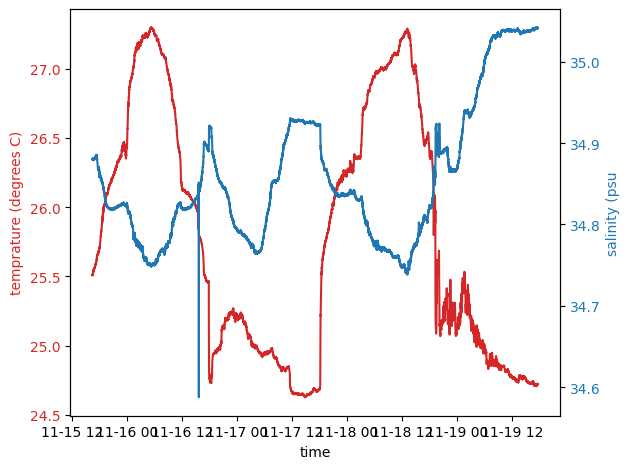

In [8]:
# Step 6.  Plot the temperature and salinity tieseries

# plot timeseries variables
x = df['time_raw']
y = df['temperature']
x2 = x
y2 = df['salinity']

# Plotting with multiple y 
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('temprature (degrees C)', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('salinity (psu', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(rotation=90)

plt.show()

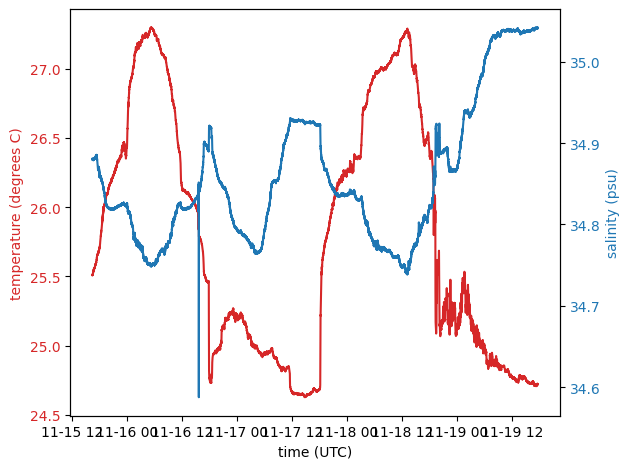

In [9]:
# Step 6.  Plot the data with matplotlib

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (UTC)')
ax1.set_ylabel('temperature (degrees C)', color=color)
ax1.plot(df['time_raw'], df['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('salinity (psu)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['time_raw'], df['salinity'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Done!